In [28]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot 
%matplotlib inline 

# Part1
Our goal here is to** analyze the logins**file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. 

# Load and preprocess the data

In [2]:
# Read the 
df_login = pd.read_json('logins.json', convert_dates=True)
df_login.head()


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df_login.shape


(93142, 1)

In [4]:
df_login.sort_values('login_time', inplace=True)
df_login['LoginCount']= 1

In [5]:
df_login.tail()

,login_time,LoginCount
93136,1970-04-13 18:48:52,1
93137,1970-04-13 18:50:19,1
93139,1970-04-13 18:54:02,1
93141,1970-04-13 18:54:23,1
93140,1970-04-13 18:57:38,1


In [6]:
df_login_indexed = df_login.set_index('login_time')


In [7]:
df_login_indexed.head()


,LoginCount
login_time,
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:36,1
1970-01-01 20:16:37,1


In [8]:
# Group the login with 15 min interval
login_data = df_login_indexed.resample('15T').sum()
login_data.head()

,LoginCount
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


In [9]:
# fill the logins as 0 if there was no login during the tiem frame
login_data=login_data.fillna(0)

In [10]:
login_data.isnull().sum()

LoginCount    0
dtype: int64

# Stationarity check
Many statistical tests require that the data being tested are stationary. so my 1st task would be **Stationarity check** for the login data set

LoginCount    9.515938
dtype: float64


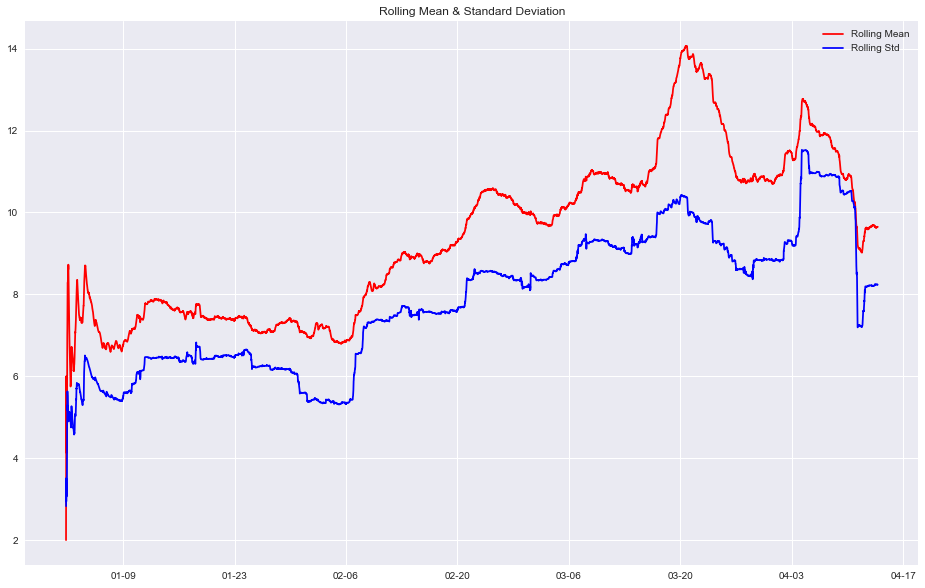

In [11]:

#Determing rolling statistics
login_mean = login_data.mean()
print(login_mean)
fig, ax = plt.subplots(figsize=(16,10))
rolmean = login_data['LoginCount'].rolling(window='7D').mean()
rolstd = login_data['LoginCount'].rolling(window='7D').std()

#Plot rolling statistics:
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='b', label = 'Rolling Std')
xfmt = mdates.DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(xfmt)
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')


In [12]:
#Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(login_data['LoginCount'])
print('Test Statistic = ', str(dftest[0]))
print( 'p-value = ' , str(dftest[1]))
print('Critical value = ' , str(dftest[4]))
 

Results of Dickey-Fuller Test:
Test Statistic =  -10.3379543091
p-value =  2.73239665422e-18
Critical value =  {'1%': -3.431020942932955, '5%': -2.8618365160244372, '10%': -2.5669278303551253}


Dickey-Fuller Test has **Ho==> Time series is Non-stationary**.
P-value is less than 0.05 and test statistic is less than the critical values. So, we can Reject the null hypothisis and say **login data is stationary**


# Data trend analysis

In [13]:
login_data.resample('M').sum()

,LoginCount
login_time,
1970-01-31,21239.0
1970-02-28,24673.0
1970-03-31,33723.0
1970-04-30,13507.0


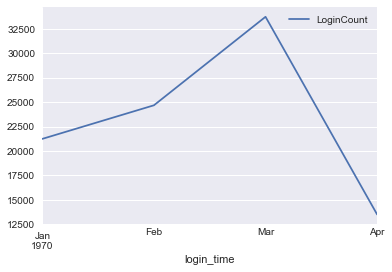

In [14]:
login_data.resample('M').sum().plot()

+  **March** month has the **maximum login.**
+ ** Why there is steep drop in April?** This needs to be **investigated.**
+ For **April Month** we have only 14 days data. Why? Is that there was no login after 14th or we do not have complete data?



In [15]:
#Analyzed the data monthwise
data_jan = login_data['1970-01']
data_feb = login_data['1970-02']
data_mar= login_data['1970-03']
data_apr = login_data['1970-04']

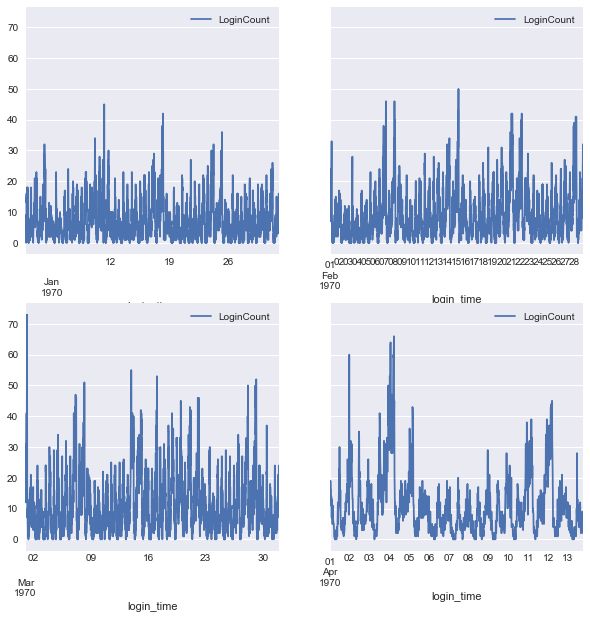

In [16]:
# visualize the data pattern
fig , ax1 = plt.subplots(nrows=2, ncols=2, figsize=(10,10), sharey=True)
data_jan.plot(ax=ax1[0,0])
data_feb.plot(ax=ax1[0,1])
data_mar.plot(ax=ax1[1,0])
data_apr.plot(ax=ax1[1,1])

+ January has the **lowest login counts**. Maximum counts in a day is 45

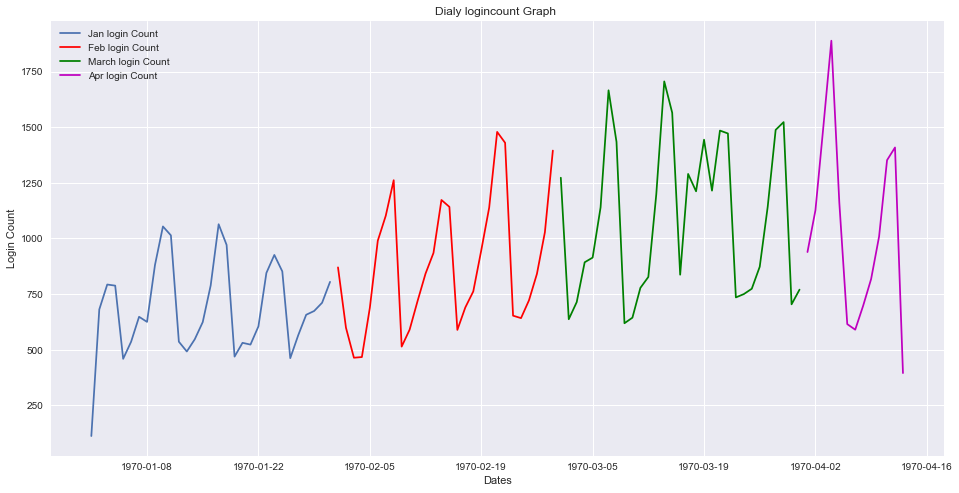

In [17]:
# Dialy logincount Graph for each Month

fig , ax1 = plt.subplots(figsize=(16,8))
plt.plot(data_jan.resample('D').sum(),label= 'Jan login Count')
plt.plot(data_feb.resample('D').sum(), color='r', label= 'Feb login Count')
plt.plot(data_mar.resample('D').sum(), color='g', label= 'March login Count')
plt.plot(data_apr.resample('D').sum(), color='m', label= 'Apr login Count')
plt.xlabel('Dates')
plt.ylabel('Login Count')
plt.legend(loc='upper left')
plt.title('Dialy logincount Graph ')


+ Some days of the months has low logins where as some days has **very high**. Probably low login is in weekdays. We will investigate this further.
+ **March** Month has the **maximum login count**. in a single day logincount is reached more than 1500.
+ We have **at least 500 logins** each day.


In [18]:
# Extract hour and wekdays
df_login['hour'] = df_login['login_time'].dt.hour
df_login['dow'] = df_login['login_time'].dt.weekday_name
df_login['month'] = df_login['login_time'].dt.month
df_login. head()

,login_time,LoginCount,hour,dow,month
6,1970-01-01 20:12:16,1,20,Thursday,1
0,1970-01-01 20:13:18,1,20,Thursday,1
1,1970-01-01 20:16:10,1,20,Thursday,1
3,1970-01-01 20:16:36,1,20,Thursday,1
2,1970-01-01 20:16:37,1,20,Thursday,1


# Weekly login analysis

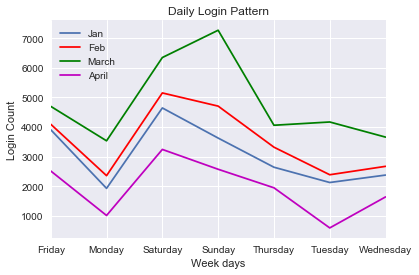

In [19]:
df_login[df_login.month==1].groupby('dow')['LoginCount'].sum().plot(label='Jan')
df_login[df_login.month==2].groupby('dow')['LoginCount'].sum().plot(  label='Feb', color='r')
df_login[df_login.month==3].groupby('dow')['LoginCount'].sum().plot( label='March', color='g')
df_login[df_login.month==4].groupby('dow')['LoginCount'].sum().plot(  label='April', color='m')
plt.xlabel('Week days')
plt.ylabel('Login Count')
plt.legend(loc='upper left')
plt.title('Daily Login Pattern')


** Weekly login pattern** is almost **similar** for all the months.

In [20]:
df_login.groupby('dow')['LoginCount'].count()

dow
Friday       15208
Monday        8823
Saturday     19377
Sunday       18167
Thursday     11960
Tuesday       9268
Wednesday    10339
Name: LoginCount, dtype: int64

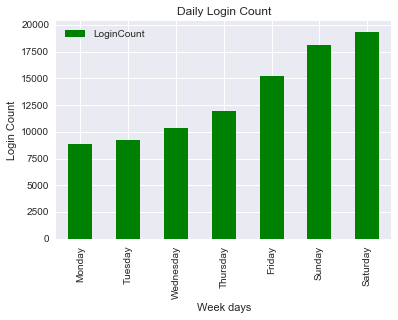

In [21]:
df_login.groupby('dow')['LoginCount'].sum().sort_values().plot(kind='bar', color='g')
plt.xlabel('Week days')
plt.ylabel('Login Count')
plt.legend(loc='upper left')
plt.title('Daily Login Count')


+ Login count on **weekends are more than the weekdays**. Maximum login on Saturday while lowest login is on Monday.

# Hourly login analysis

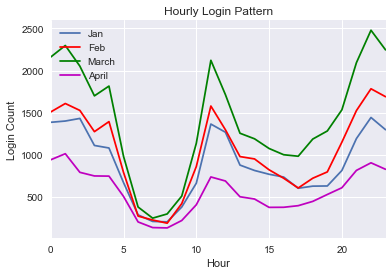

In [22]:
df_login[df_login.month==1].groupby('hour')['LoginCount'].sum().plot( label='Jan')
df_login[df_login.month==2].groupby('hour')['LoginCount'].sum().plot(  label='Feb', color='r')
df_login[df_login.month==3].groupby('hour')['LoginCount'].sum().plot( label='March', color='g')
df_login[df_login.month==4].groupby('hour')['LoginCount'].sum().plot(  label='April', color='m')
plt.xlabel('Hour')
plt.ylabel('Login Count')
plt.legend(loc='upper left')
plt.title('Hourly Login Pattern')

Hourly Login pattern is almost similar for each month. Let's make a bar chart to see what is the peak login hours and what is the timings we get least login.

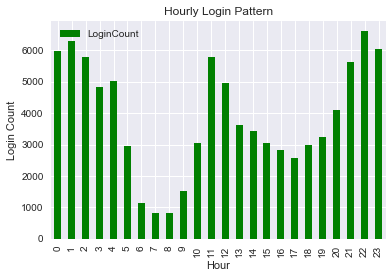

In [23]:
df_login.groupby('hour')['LoginCount'].sum().plot(kind='bar', color='g')
plt.xlabel('Hour')
plt.ylabel('Login Count')
plt.legend(loc='upper left')
plt.title('Hourly Login Pattern')

** Hourly login pattern** is also **similar** for all the months.

**Most of the logins are during night time**. **9:00pm - 4:00am** is the **peak hours** 6:00-9:00am has the lowest login count.**

# Part2- Experiment and metrics design

**Question1:**

As Key major of success I will binomial testing

**Question2:**

-	I will choose 100 drivers for the experiment and reimburse the toll amount for 1 month to them.
-	After a month, I will conduct  a survey with a question - “Do you prefer to continue to serve both the cities if toll is reimbursed" with 3 response options ‘Yes’, ‘No’, ‘Not sure’
-	If majority > 50% has the answer as ‘Yes’, no statistical test is required and I will assume that experiment is successful.
-	Otherwise we can do the hypothesis as 
    + H0--> More than 50% don’t prefer the experiment
    + H1--> More than 50% prefer the experiment
-	Now I will run the binomial test and compare the z-square to select the null hypothesis or alternate hypothesis.

